#### 5. Backprogation1
- 계산 그래프 : 어떻게 그리는지 확인
    - node / edge로 표현
    - 순전파 : 왼쪽 -> 오른쪽
    - 역전파 : 오른쪽 -> 왼쪽
- 국소적 계산 X
- 연쇄 법칙(Chain Rule)
    - 원리 : 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.
- 역전파
    - 덧셈 : 그대로 흘려보냄(순방향 입력 신호의 값 필요 X)
    - 곱셈 : 순방향 입력 신호의 값 필요

In [1]:
# 덧셈 역전파
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x,y):
        out = x+y
        return out
    
    def backward(self, dout):
        dx, dy = dout * 1,dout * 1
        return dx, dy

# 곱셈 역전파
class MulLayer:
    def __init__(self):
        self.x, self,y = None, None
    
    def forward(self, x, y):
        self.x, self.y = x, y
        out = x * y
        return out
    
    def backward(self, dout):
        # x, y를 바꾼다.
        dx = dout * self.y 
        dy = dout * self.x
        return dx, dy

#### 5 Backpropagation(2)
- Sigmoid
    - y = 1 / (1 + exp(-x))
    - 역전파 X
- 5,6단원 코드 잘 보기
- 미분되어가는 과정
- Affine Class 잘보기 / 뒤에는 내지 않을 예정
- 구조 이해하기
- ReLU Class

In [2]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        # boolean 으로 저장
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx
    
class Affine:
    def __init__(self, w, b):
        self.W, self.b, self.x, self.dW, self.db = W, b, None, None, None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx

#### 5단원 정리
- 계산그래프 그리는 방법
- 계산 그래프 상에서 미분하는 방법
- ReLU 역전파 구현
- Sigmoid X but 미분하는 과정 한번 보기

#### 6 Various learning methods 1

- 최적화
    - NN 학습의 목적 : 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것
    - 매개변수의 기울기(미분)을 이용하여 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복
    
- SGD
    - 장점 : 단순, 대중적
    - 단점 : 비등방성(방향에 따라 기울기가 달라지는)함수에서 탐색 경로가 비효율적
    - 단점 : 무조건 기울어진 방향으로 진행하는 단순한 방식
    
- 모멘텀
    - 특징 : 속도라는 변수가 추가됨으로써 공이 구르는 듯한 움직임을 보여줌
    - SGD 보다 x축으로 빠르게 다가가 지그재그 정도 움직임이 줄어듦

- AdaGrad(Adaptive Gradient)
    - 특징 : 학습을 진행하면서 학습률을 점차 줄여가는 방법
    - 처음에는 크게 움직이고 지그재그 움직임이 줄어듦
    - 단점 : 학습의 갱신 강도가 약해져, 무한히 학습하면 0으로 수렴함
    
- RMSProp
    - 특징 : 기울기를 누적이 아니고 새로운 기울기 정보를 반영(지수이동평균)
    - p 라는 변수를 이용해 최신 기울기에 가중치를 준다.
   
- Adam
    - 특징 : 모멘텀과 AdaGrad의 장정을 조합
    - 초매개변수의 편향 보정이 진행

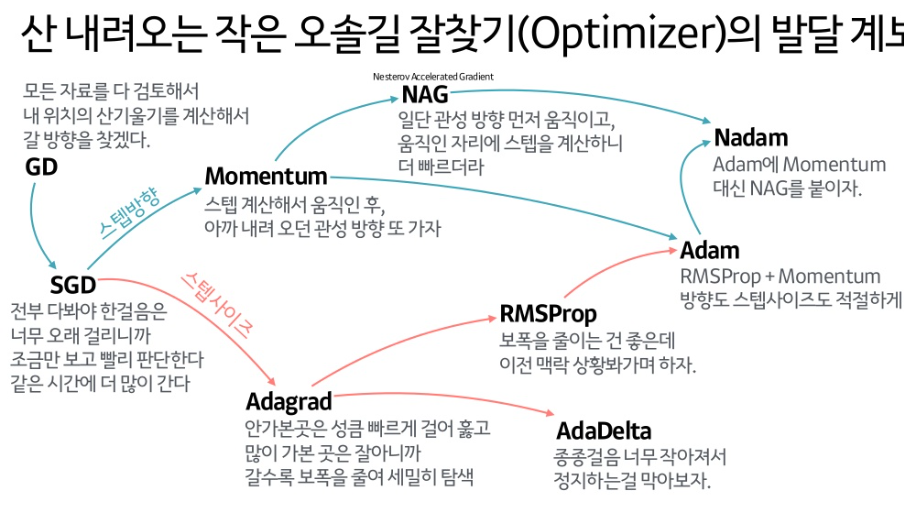

#### 6 Various learning methods 2

- 최적화
    - 가중치 초기값
        - 균일한 값으로 설정하면 안됨
        - 무작위로 설정
        - 가중치 값을 작게 해 오버피팅을 방지
    - 가중치 값에 따른 은닉층 활성화 값 변화
        - 표준편차 1인 정규분포 : 기울기가 0에 수렴 => 기울기 소실
        - 표준편차 0.01인 정규분포 : 표현력을 제한
        - Xavier : 앞 층의 노드가 n이면 표준편차가 1/sqrt(n)인 분포
        - ReLU : 표준편차가 sqrt(2/n)인 분포 => 모든 층에서 균일한 분포

- 배치 정규화
    - 특징
        - 각 층의 활성화 값을 적당히 분포되도록 조정
    - 장점
        - 학습 속도 개선
        - 초기값 의존도 낮아짐
        - 오버피팅 억제
        
- 오버피팅
    - 훈련 데이터만 지나치게 적용되어 그 외 데이터에는 제대로 대응하지 못하는 상태
    - 일어나는 이유
        - 매개변수가 많고 표현력이 높은 모델(뉴런의 수가 많은 경우)
        - 훈련 데이터가 적을 때
    - 방지 방법
        - 가중치 감소
            - 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문에 큰 가중치에 대해서 그에 상응하는 큰 페널티를 부과
            - 손실함수에 가중치의 L2 노름(L2 Norm)을 더함
        - Dropout
            - 훈련 시 은닉층의 뉴런을 무작위로 골라 삭제
            - 훈련 데이터와 시험 데이터에 대한 정확도 차이가 준다.
            - 표현력을 높이면서 오버피팅 억제 가능
            
            
- 초매개변수(Hyper-parameter) 최적화
    - 초매개변수 조정 용 데이터 : 검증 데이터(Validation data) Why? 오버피팅
    - 과정
        - 1. 초매개변수 값의 범위를 설정
        - 2. 설정된 범위에서 초매개변수의 값을 랜덤으로 추출
        - 3. 2단계의 초매개변수로 학습하고, 검증 데이터로 정확도 평가
        - 4. 2,3단계를 반복해 결과를 보고 초매개변수의 범위를 좁힘 

#### 7 Convolution Neural Network 1

- 구조
    - 합성곱(Conv), 풀링(Pooling) 계층 추가
    - 'Affine-ReLU' => 'Conv-ReLU-Pooling' / Pooling 생략되기도 함
    - 출력에 가까운 층에서는 'Affine-ReLU' 구성이 그대로 사용
    - 마지막 출력 층에서는 'Affine-Soffmax' 조합이 사용됨
    
- Affine 계층의 문제점
    - Affine 계층에서는 1차원의 데이터만 가능
    - 3차원의 이미지 데이터를 
    - 모든 입력 데이터를 동등한 뉴런으로 취금해 형상에 담긴 정보를 살릴 수 없음
    - 합성곱 계층에서는 형상이 유지됨

- 합성곱 연산
    - 입력 데이터 * 필터 => + 편향 => 출력 데이터
    - 패딩 : 주변을 특정 값으로 채우는 작업
    - 스트라이드 : 필터를 적용하는 위치의 간격
    - 입력 크기(H,W), 필터 크기(FH, FW), 출력 크기(OH, OW), 패딩 P, 스트라이드 S
        - OH = (H + 2P - FH) / S + 1
        - OW = (W + 2P - FW) / S + 1
        - 정수가 아니면 오류로 예외처리
        
- 풀링
    - 세로 / 가로 방향의 공간을 줄이는 연산
        - 특정 윈도우에서 최대값이나 평균값을 선택해 그 영역의 대표값으로 사용
        - 윈도우, 스트라이드는 같은 값
    - 특징
        - 학습해야할 매개변수가 없음
        - 채널 수가 변하지 않음
        - 입력의 변화에 영항을 적게 받음(강건성)

#### 7 Convolution Neural Network 2

- im2col
    - 특징
        - for문을 통한 합성곱 연산 : 성능이 떨어짐
        - 입력 데이터를 필터링하기 좋게 전개하는 함수
        - N차원의 배열을 2차원으로 변환
    - 연산
        - im2col을 통해 입력 데이터를 2차원 데이터로 변경
        - 필터의 집합도 2차원 데이터로 변경
        - 변경된 입력데이터와 필터를 내적
        - 출력 데이터를 원래의 4차원 형태로 변형
        
- CNN 층 깊이
    - 층의 깊이에 비례해 정확도가 좋아진다.
    - 층이 깊어지면 더 복잡하고 추상화된 정보가 추출된다.
    - 이점
        - 신경망의 매개변수 수가 줄어든다.
        
- 대표적인 CNN
    - LeNet
        - 손글씨 숫자를 인식하는 네트워크
        - LeNet은 시그모이드 함수 사용 / 현재는 주로 ReLU
        - 서브샘플링을 해 중간 데이터의 크기를 줄인다. / 현재는 최대 풀링
    - AlexNet
        - 합성곱 계층과 풀링 계층을 거듭하며 마지막으로 완전연결 계층을 거쳐 결과를 출력
        - 활성화 함수로 ReLU 이용
        - 국소적 정규화를 실시하는 계층을 이용
        - 드롭아웃을 사용

#### 8 Deep Neural Network 1

- 딥러닝
    - 의미 : 층을 깊게 한 심층 신경망
    
- 층을 깊게 하는 이유
    - NN의 층을 깊게 할 수록 정확도가 높아짐
    - 신경망의 매개변수 수가 줄어듦
    - 학습의 효율성을 높인다.
    - 정보를 계층적으로 전달 가능하다.

#### 6 Evaluation

- RME
    - sum(absolute(a-b))/n
- RMSE
    - sqrt(RME)

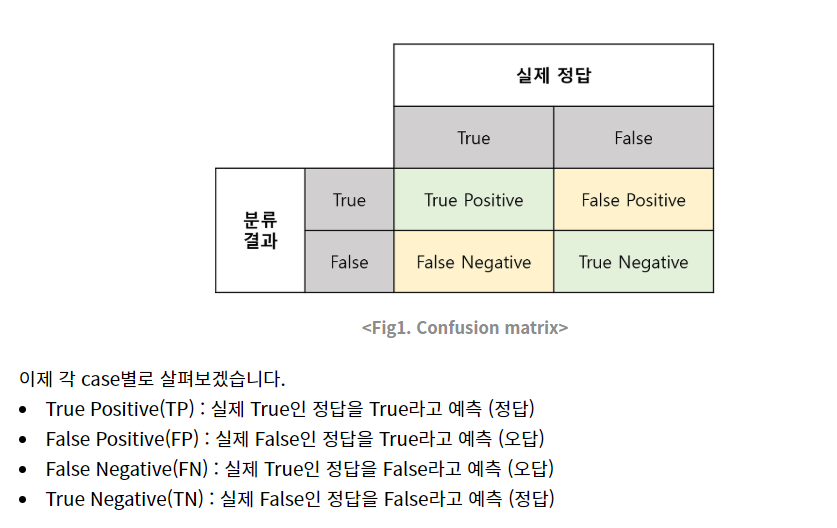

- Precision : TP / (TP + FP)
- Recall : TP / (TP + FN)
- F1 : (2 * Precision * Recall) / (Precision + Recall)

- NDCG
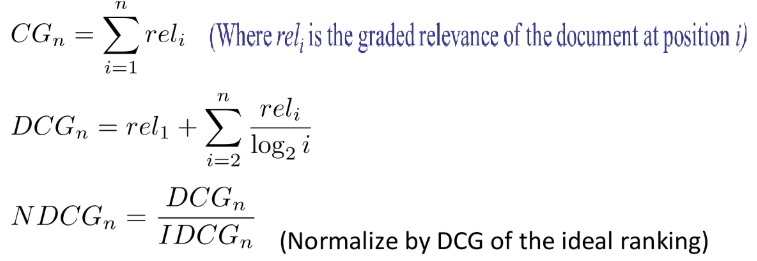

7단원
- CNN 구조적인 측면에서 진행되는 과정
- NN과의 차이점
- 합성곱, 풀링 계층이 어떻게 계산 되는지
- 패딩, 스트라이드
- 연산이 진행되는 과정
- 합성곱, 풀링 계층 코드 이해
- im2col로 합성곱, 풀링 계층 하는 과정 이해
- CNN Class SimpleCovNet 코드 숙지
- 층이 깊어질수록 고급 정보가 추출됨 / 층이 왜 깊어지는지
- 대표적인 CNN (보너스 점수)

8단원
- 딥러닝의 의미
- 구조가 어떻게 되어있는지
- 코드 X
- 층을 깊게 했을 때 정확도, 효율성이 올라가는 이유?

추천시스템
- Precision / Recall
-DCG /MAE /RMSE / MA?